#### Importing Libraries and Dependencies


In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data preprocessing

##### Training Image Preprocessing

In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 189661 files belonging to 107 classes.


##### Validation Image Preprocessing

In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 50125 files belonging to 107 classes.


In [24]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[  1.         1.         1.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]
   ...
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]]

  [[  1.         1.         1.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]
   ...
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]]

  [[  1.         1.         1.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]
   ...
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]]

  ...

  [[ 88.        85.        47.5     ]
   [ 88.5       85.        46.75    ]
   [ 90.25      85.75      44.75    ]
   ...
   [  1.         1.         3.      ]
   [  1.         1.         1.      ]
   [  1.         1.         1.      ]]

  [[ 74.5       82.5       42.75  

#### Building Model

In [25]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))])

##### Building Convolution layer

In [27]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [28]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [29]:
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [30]:
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [31]:
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [32]:
model.add(Dropout(0.25)) # 25% of neurons will be turned off randomly during each epoch | to avoid overfitting

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(units=1500, activation='relu'))

In [35]:
model.add(Dropout(0.4)) # 40% of neurons will be turned off randomly during each epoch | to avoid overfitting

##### Output Layer

In [36]:
model.add(Dense(units=107, activation='softmax'))

##### Compiling Model

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 64)        36928     
                                                      

#### Training Model

In [39]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
5927/5927 [==============================] - 703s 117ms/step - loss: 1.5238 - accuracy: 0.5622 - val_loss: 0.7903 - val_accuracy: 0.7399
Epoch 2/10
5927/5927 [==============================] - 838s 141ms/step - loss: 0.7883 - accuracy: 0.7416 - val_loss: 0.7521 - val_accuracy: 0.7498
Epoch 3/10
5927/5927 [==============================] - 923s 156ms/step - loss: 0.7105 - accuracy: 0.7624 - val_loss: 0.7389 - val_accuracy: 0.7562
Epoch 4/10
2308/5927 [==========>...................] - ETA: 8:03 - loss: 0.6870 - accuracy: 0.7693

KeyboardInterrupt: 

#### Model Evaluation

##### On Training set

In [172]:
train_loss, train_acc = model.evaluate(training_set)

4394/4394 [==============================] - 145s 33ms/step - loss: 0.1401 - accuracy: 0.9527


In [173]:
print(train_loss, train_acc)

0.1400521844625473 0.9527420401573181


##### On Evaluation set

In [174]:
val_loss, val_acc = model.evaluate(validation_set)

1099/1099 [==============================] - 38s 34ms/step - loss: 0.4165 - accuracy: 0.8866


In [175]:
print(val_loss, val_acc)

0.4165365695953369 0.8865809440612793


#### Saving Model

In [177]:
model.save('trained_model.keras')

In [178]:
training_history.history

{'loss': [1.6925312280654907,
  0.46316665410995483,
  0.30600404739379883,
  0.2572186589241028,
  0.2273293286561966,
  0.21079622209072113,
  0.19900652766227722,
  0.20069348812103271,
  0.17105360329151154,
  0.1837795078754425],
 'accuracy': [0.5072053670883179,
  0.8468382954597473,
  0.8978874683380127,
  0.9133082032203674,
  0.9243331551551819,
  0.9306280612945557,
  0.9345970749855042,
  0.9349526762962341,
  0.9443203806877136,
  0.9420300126075745],
 'val_loss': [0.6424582004547119,
  0.41937899589538574,
  0.3569677472114563,
  0.34186482429504395,
  0.3605782389640808,
  0.4236876964569092,
  0.4321832060813904,
  0.4180993437767029,
  0.4051000773906708,
  0.416536420583725],
 'val_accuracy': [0.7931368350982666,
  0.866662859916687,
  0.8852720260620117,
  0.8965968489646912,
  0.8931254148483276,
  0.8765080571174622,
  0.8795811533927917,
  0.89028000831604,
  0.8944343328475952,
  0.8865809440612793]}

#### Recording History
JSON format

In [179]:
import json
with open('training_history.json', 'w') as f:
    json.dump(str(training_history.history), f)

#### Accuracy Visualization

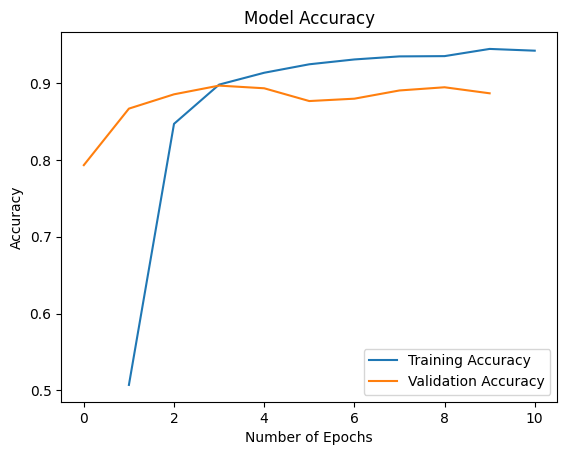

In [185]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

#### Some other metrics of model evaluation

In [186]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [187]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 35144 files belonging to 38 classes.


In [189]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

1099/1099 [==============================] - 36s 32ms/step


(array([[9.9915862e-01, 6.4708024e-06, 8.8778073e-12, ..., 6.1002414e-22,
         1.7011032e-17, 1.9308324e-14],
        [9.9915862e-01, 6.4707660e-06, 8.8781456e-12, ..., 6.1006600e-22,
         1.7010901e-17, 1.9308287e-14],
        [9.9995947e-01, 3.0166379e-07, 1.1655638e-12, ..., 6.4774145e-16,
         5.1538757e-15, 3.1508383e-11],
        ...,
        [8.5607862e-21, 0.0000000e+00, 3.9903668e-20, ..., 9.6372344e-07,
         1.1443675e-20, 9.9999738e-01],
        [2.0425022e-08, 3.4851150e-14, 2.7591848e-13, ..., 1.0507370e-07,
         1.3339031e-06, 9.9739766e-01],
        [2.0425022e-08, 3.4851150e-14, 2.7591848e-13, ..., 1.0507370e-07,
         1.3339031e-06, 9.9739766e-01]], dtype=float32),
 (35144, 38))

In [191]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [193]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(35144, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [198]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

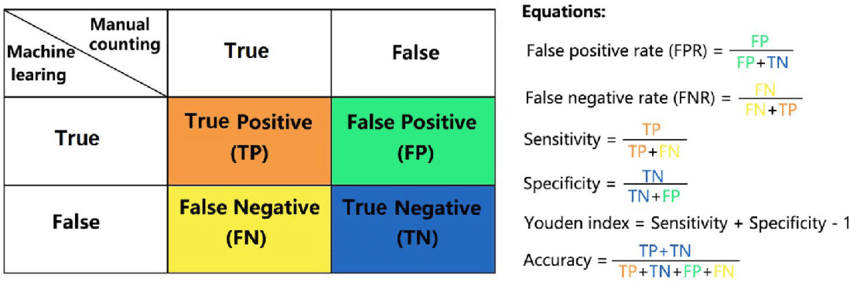

In [195]:
from sklearn.metrics import confusion_matrix, classification_report 

In [199]:
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.75      0.82      1008
                                 Apple___Black_rot       0.95      0.93      0.94       994
                          Apple___Cedar_apple_rust       0.94      0.92      0.93       880
                                   Apple___healthy       0.81      0.92      0.86      1004
                               Blueberry___healthy       0.94      0.82      0.88       908
          Cherry_(including_sour)___Powdery_mildew       0.95      0.96      0.96       842
                 Cherry_(including_sour)___healthy       0.91      0.97      0.94       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.87      0.87       820
                       Corn_(maize)___Common_rust_       0.97      0.97      0.97       954
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.91      0.

In [203]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[756,  22,   2, ...,   2,   2,   0],
       [ 10, 922,   4, ...,   0,   0,   0],
       [  2,   4, 806, ...,   4,   2,   6],
       ...,
       [  0,   0,   0, ..., 942,   0,   2],
       [  0,   0,   0, ...,   2, 794,   6],
       [  0,   0,   2, ...,  14,   0, 836]], dtype=int64)

#### Confusion Matix Visualization

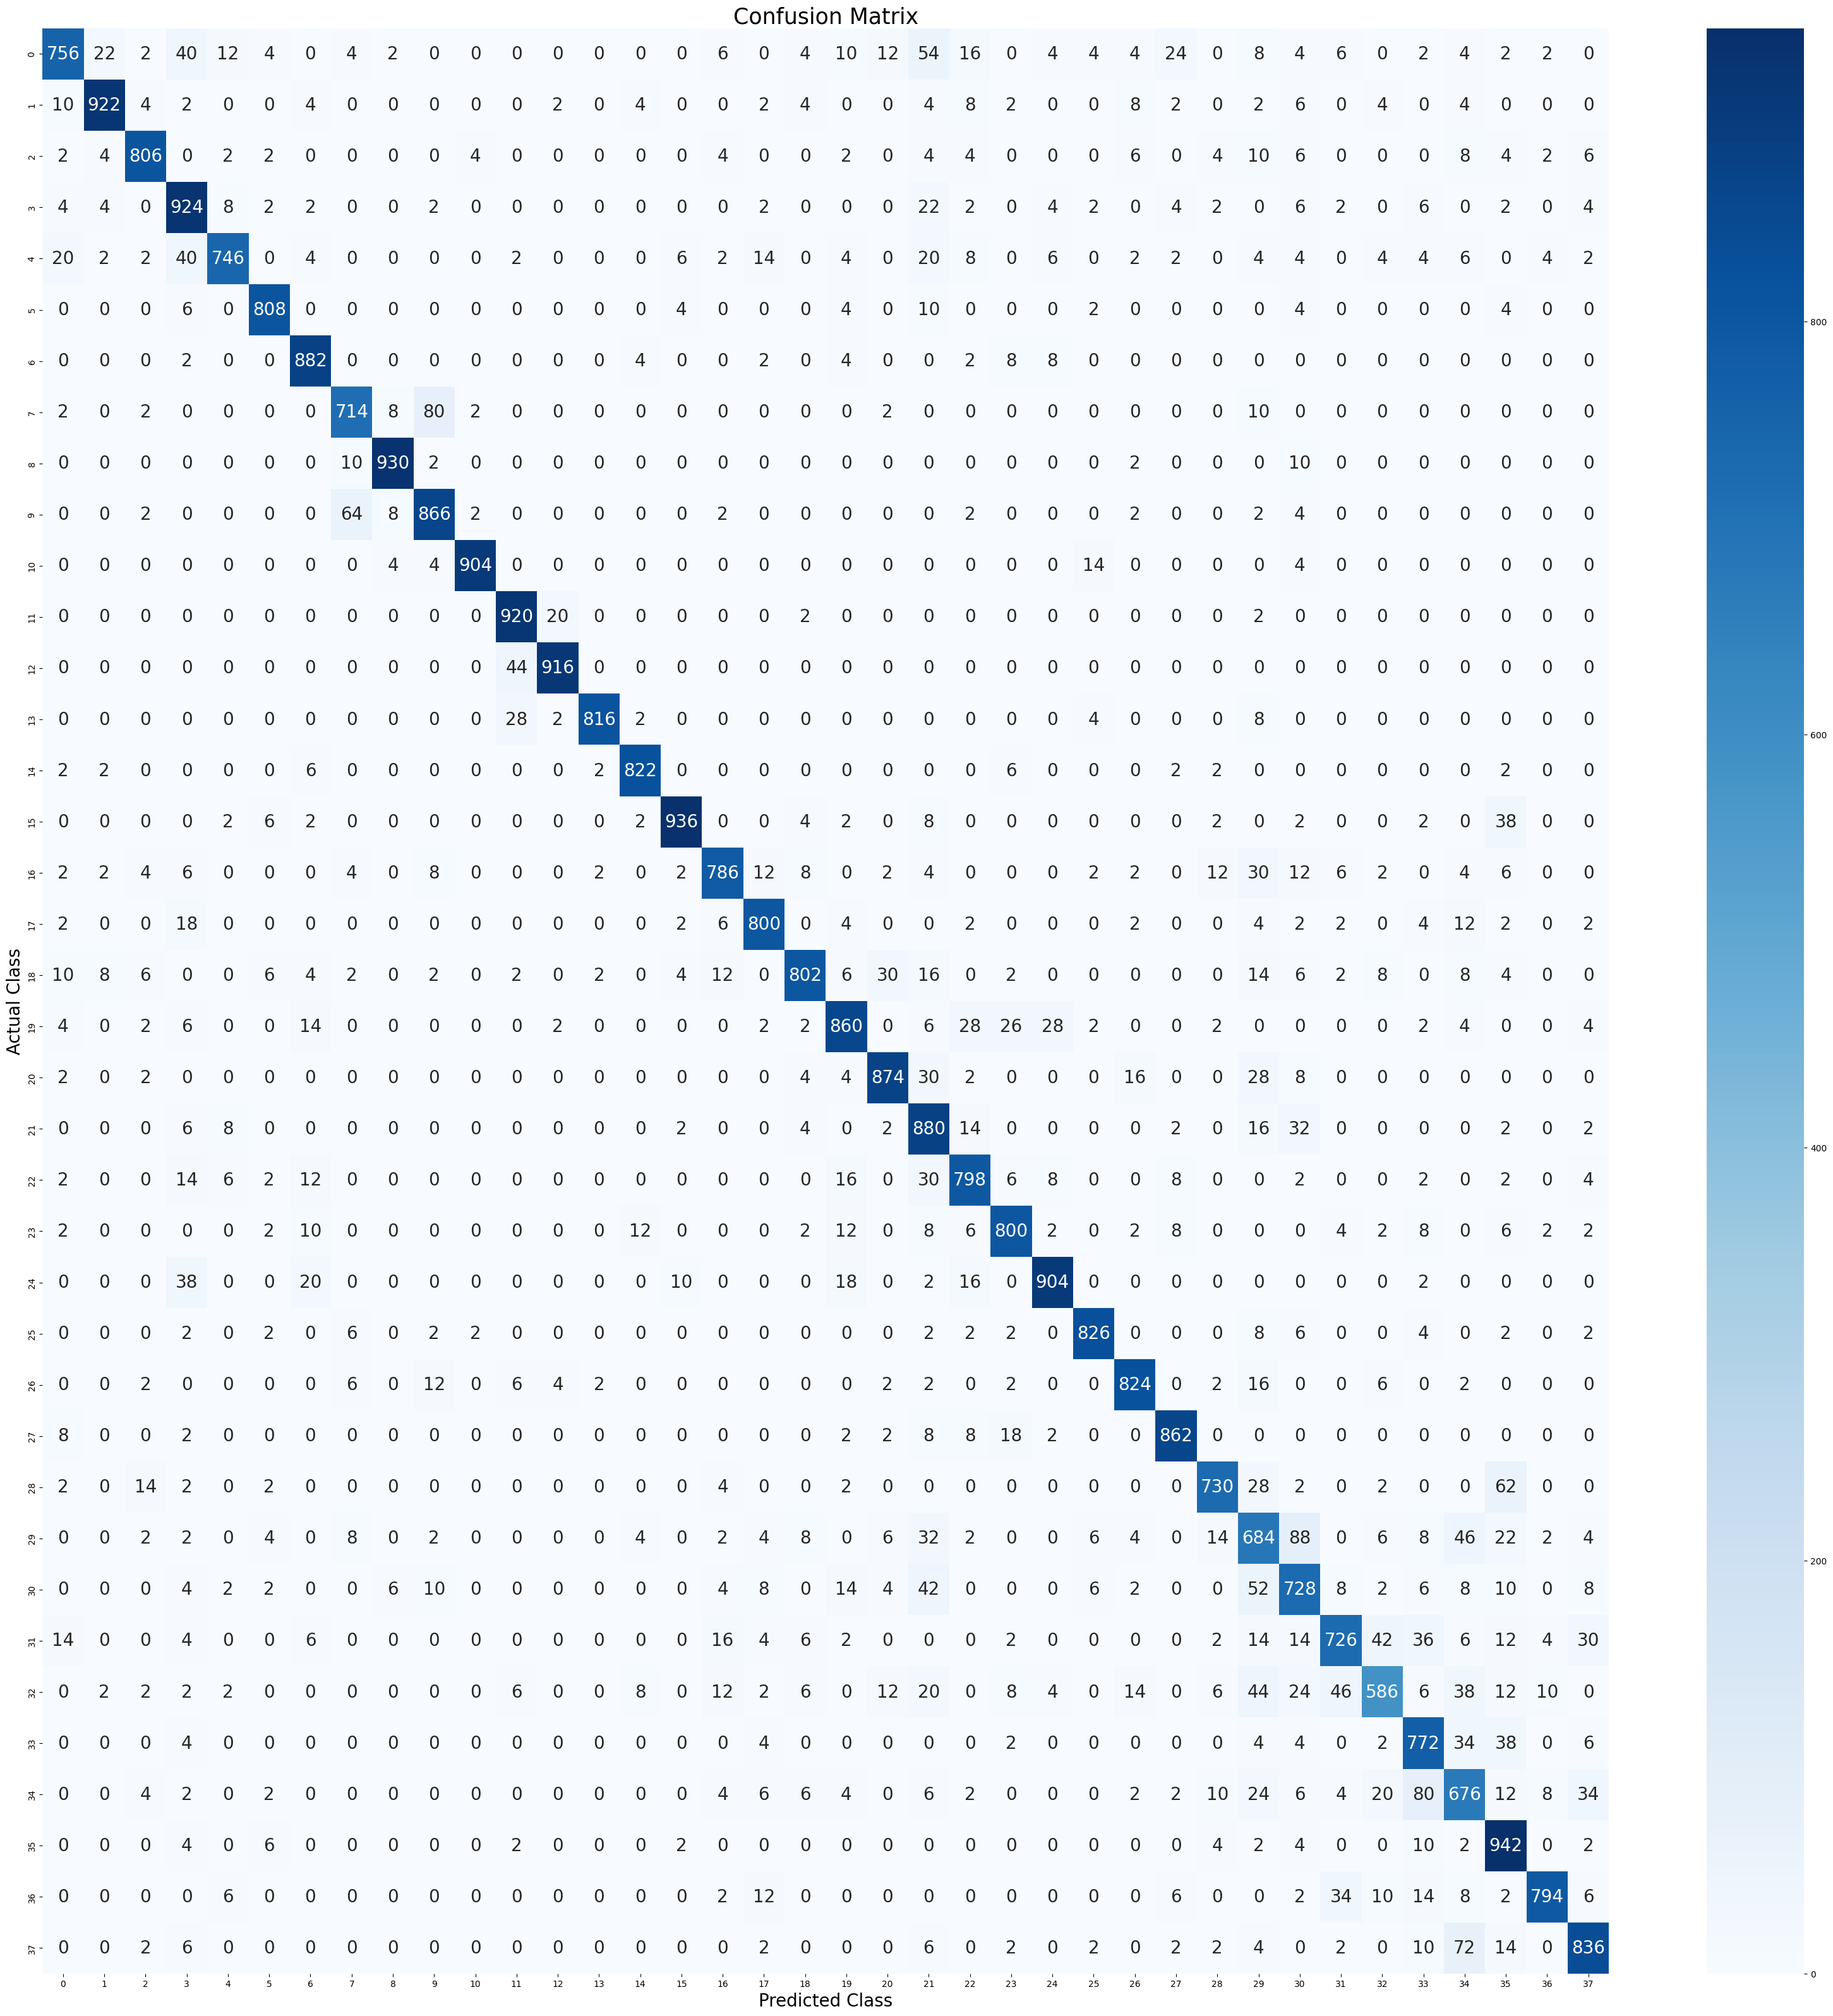

In [216]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size': 20}, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()